# Crime Project

In [153]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

# Google developer API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [154]:
# Store filepath in a variable
shooting_crime_file = "Resources/NYPD_Shooting_Incident_Data__Historic_.csv"

shooting_df = pd.read_csv(shooting_crime_file)
shooting_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,156430715,09/02/2016,20:36:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,25-44,F,BLACK,1007885,246406,40.842979,-73.914580,POINT (-73.91457972899997 40.842979335000045)
1,145001700,08/02/2015,1:30:00,BRONX,43,0.0,NaN,False,NaN,NaN,NaN,<18,F,BLACK,1023203,238742,40.821890,-73.859262,POINT (-73.85926192199997 40.82188959900003)
2,137584243,07/04/2014,22:39:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1000493,236572,40.816005,-73.941320,POINT (-73.94131972799995 40.81600451200006)
3,154563857,07/03/2016,1:30:00,BROOKLYN,83,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1008115,190458,40.689416,-73.913947,POINT (-73.91394709799994 40.68941602700004)
4,33160009,07/17/2007,23:30:00,BROOKLYN,71,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,995163,178527,40.656694,-73.960670,POINT (-73.96066977199997 40.656693553000025)


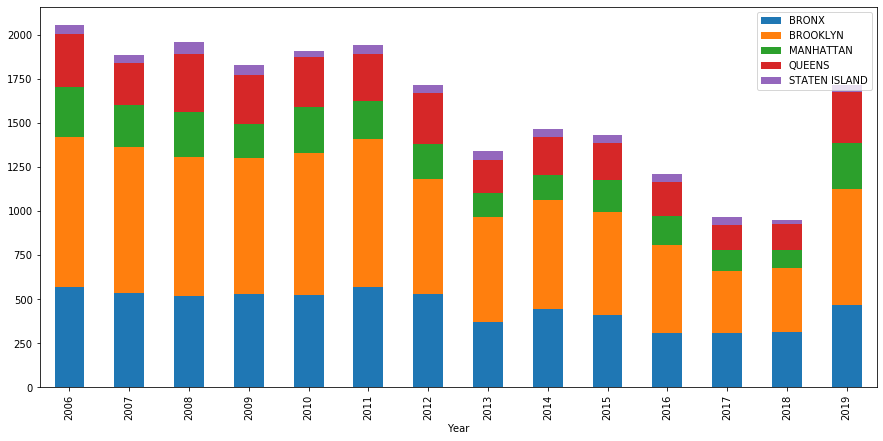

In [155]:
shooting_df["Year"] = pd.DatetimeIndex(shooting_df['OCCUR_DATE']).year

shooting_counts = shooting_df.groupby(["Year","BORO"])["Year"].count().unstack("BORO")

shooting_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")

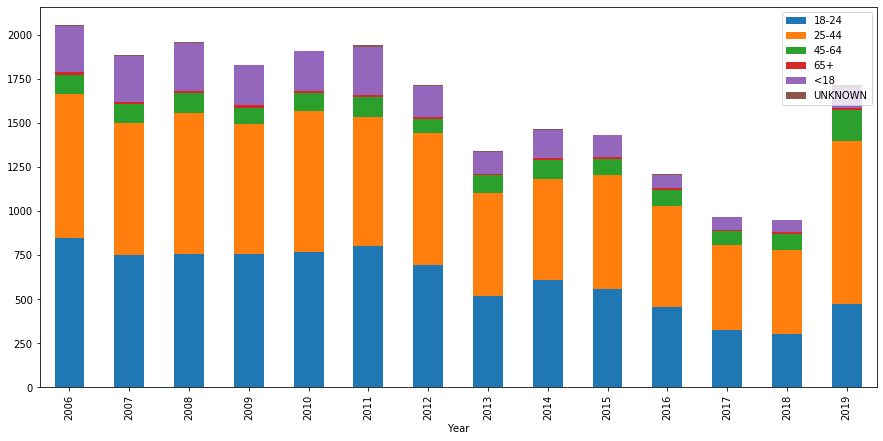

In [156]:
shooting_victim_age_counts = shooting_df.groupby(["Year","VIC_AGE_GROUP"])["Year"].count().unstack("VIC_AGE_GROUP")

shooting_victim_age_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="upper right")

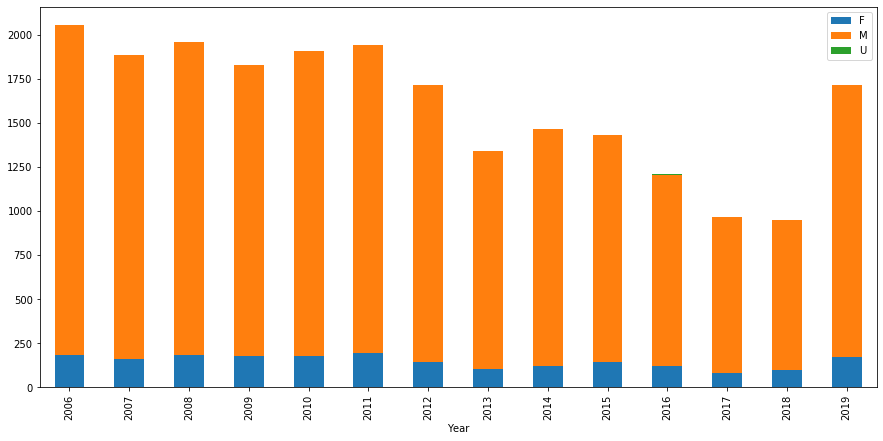

In [157]:
shooting_victim_sex_counts = shooting_df.groupby(["Year","VIC_SEX"])["Year"].count().unstack("VIC_SEX")

shooting_victim_sex_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")

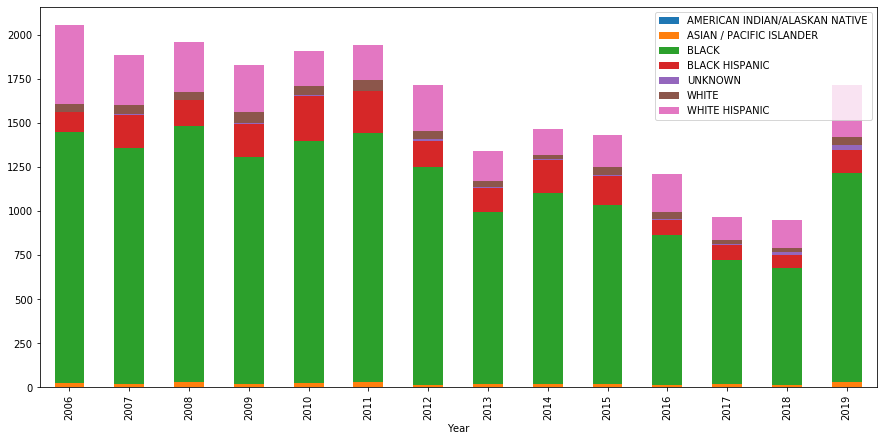

In [158]:
shooting_victim_race_counts = shooting_df.groupby(["Year","VIC_RACE"])["Year"].count().unstack("VIC_RACE")

shooting_victim_race_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")

In [159]:
# Store latitude and longitude in locations
locations = shooting_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
#weights = shooting_df["Year"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations)#, weights) 
                                 #dissipating=False, max_intensity=10,
                                 #point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [166]:
shooting_df[["TIME_HOUR","TIME_MIN","TIME_SEC"]] = shooting_df['OCCUR_TIME'].str.split(":",expand=True)
shooting_df['TIME_HOUR'] = pd.to_numeric(shooting_df['TIME_HOUR'])

bins = [0,8,16,25]
labels = ["early morning", "morning/afternoon", "afternoon/evening"]

shooting_df["Time Buckets"] = pd.cut(shooting_df["TIME_HOUR"], bins, labels=labels, include_lowest=True)
shooting_df


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Year,TIME_HOUR,TIME_MIN,TIME_SEC,Time Buckets
0,156430715,09/02/2016,20:36:00,BRONX,44,0.0,NaN,False,NaN,NaN,...,1007885,246406,40.842979,-73.914580,POINT (-73.91457972899997 40.842979335000045),2016,20,36,00,afternoon/evening
1,145001700,08/02/2015,1:30:00,BRONX,43,0.0,NaN,False,NaN,NaN,...,1023203,238742,40.821890,-73.859262,POINT (-73.85926192199997 40.82188959900003),2015,1,30,00,early morning
2,137584243,07/04/2014,22:39:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,...,1000493,236572,40.816005,-73.941320,POINT (-73.94131972799995 40.81600451200006),2014,22,39,00,afternoon/evening
3,154563857,07/03/2016,1:30:00,BROOKLYN,83,0.0,NaN,False,NaN,NaN,...,1008115,190458,40.689416,-73.913947,POINT (-73.91394709799994 40.68941602700004),2016,1,30,00,early morning
4,33160009,07/17/2007,23:30:00,BROOKLYN,71,0.0,NaN,False,NaN,NaN,...,995163,178527,40.656694,-73.960670,POINT (-73.96066977199997 40.656693553000025),2007,23,30,00,afternoon/evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22370,88244185,12/22/2012,21:06:00,BRONX,52,0.0,NaN,False,NaN,NaN,...,1014902,256702,40.871217,-73.889172,POINT (-73.88917179999999 40.87121718800007),2012,21,06,00,afternoon/evening
22371,198255470,06/09/2019,22:20:00,BRONX,42,0.0,NaN,False,NaN,NaN,...,"1,015,667","243,850",40.835940,-73.886466,POINT (-73.88646598899999 40.83593960600007),2019,22,20,00,afternoon/evening
22372,92597742,08/30/2013,20:15:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,...,1005662,185960,40.677076,-73.922807,POINT (-73.922806612 40.67707631800005),2013,20,15,00,afternoon/evening
22373,75202879,10/23/2010,4:44:00,MANHATTAN,13,0.0,RESTAURANT/DINER,True,18-24,M,...,984732,208134,40.737965,-73.998262,POINT (-73.99826214699993 40.73796459700003),2010,4,44,00,early morning


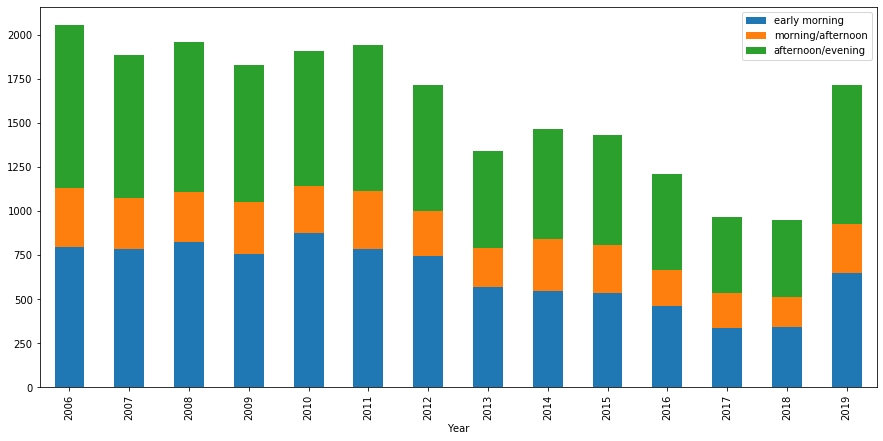

In [167]:
shooting_time_counts = shooting_df.groupby(["Year","Time Buckets"])["Year"].count().unstack("Time Buckets")

shooting_time_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")